In [77]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

mat_content = sio.loadmat( 'face(1).mat' )

face_data        = mat_content[ 'X' ]
face_data_labels = mat_content[ 'l' ]

print( 'Face Data {}'.format( face_data.shape ) )
print( 'Face Label {}'.format( face_data_labels.shape ) )

Face Data (2576, 520)
Face Label (1, 520)


# Create a train test split

In [117]:
train_set, test_set, train_label, test_label = train_test_split( face_data.T, face_data_labels.T, test_size = 0.2,
                                                                random_state = 20 )

train_set   = train_set.T.astype('float64')
test_set    = test_set.T.astype('float64')
train_label = train_label.T 
test_label  = test_label.T

print( 'Train_Set {}'.format( train_set.shape ) )
print( 'Test_Set {}'.format( test_set.shape ) )

print( 'Train_Label {}'.format( train_label.shape ) )
print( 'Test_Label {}'.format( test_label.shape ) )

Train_Set (2576, 416)
Test_Set (2576, 104)
Train_Label (1, 416)
Test_Label (1, 104)


Mean Face Shape (2576,)


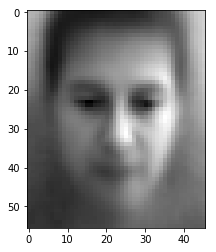

In [118]:
mean_face = np.mean( train_set, axis = 1 )

print( 'Mean Face Shape {}'.format( mean_face.shape ) )
mean_face_img = np.reshape(mean_face,(46,56))
plt.imshow( mean_face_img.T, cmap = 'gist_gray')

In [119]:
class_indexes = { k : [] for k in range( 1, 53 ) }

for i in range( train_label.shape[ 1 ] ):
    class_indexes[ train_label.T[ i ].item() ].append( i )
    
for i in range( 1, len( class_indexes ) + 1 ):
    print( i, class_indexes[ i ], len( class_indexes[ i ] ) )

1 [4, 9, 63, 96, 159, 184, 338, 344, 387] 9
2 [69, 158, 215, 229] 4
3 [61, 73, 97, 98, 144, 333, 337, 340, 382] 9
4 [13, 41, 100, 108, 130, 163, 254] 7
5 [21, 59, 164, 189, 269, 346, 363, 405] 8
6 [78, 89, 112, 199, 232, 236, 276, 298, 301] 9
7 [40, 45, 86, 204, 220, 235, 240, 253, 277] 9
8 [129, 171, 331, 342, 357, 360] 6
9 [2, 12, 72, 92, 110, 154, 255, 261, 322] 9
10 [23, 67, 131, 168, 226, 245] 6
11 [31, 50, 87, 106, 139, 231, 273, 393] 8
12 [53, 102, 132, 148, 222, 230, 325, 406] 8
13 [3, 74, 115, 153, 160, 214, 282, 318, 319] 9
14 [133, 183, 201, 203, 208, 258, 268, 315, 329] 9
15 [107, 252, 265, 339, 385, 394] 6
16 [93, 200, 238, 270, 289, 296, 302, 317] 8
17 [36, 77, 123, 150, 207, 209, 259, 408] 8
18 [66, 138, 142, 186, 219, 243, 284, 313] 8
19 [157, 256, 288, 303, 341, 359] 6
20 [14, 25, 43, 180, 182, 212, 263, 266, 352, 395] 10
21 [1, 26, 28, 71, 143, 190, 216, 297, 379, 380] 10
22 [68, 75, 99, 151, 233, 241, 293, 326, 411] 9
23 [44, 51, 64, 192, 206, 300, 412] 7
24 [121, 17

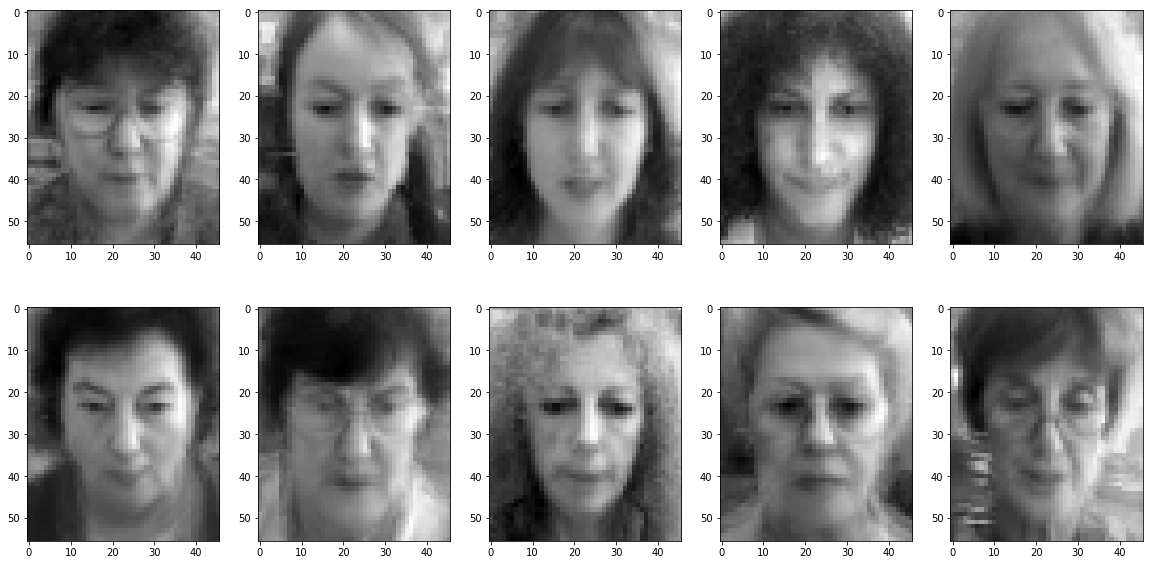

In [120]:
class_means = []

for i in range( 1, len( class_indexes ) + 1 ):
    
    temp = np.zeros( 2576 )
    
    
    for k in class_indexes[ i ]:
        temp += train_set.T[ k ]
        
    class_means.append( temp / len( class_indexes[ i ] ) )

class_means = np.asarray( class_means )

fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    
    img = np.reshape( class_means[ i ], ( 46, 56 ) )
    
    fig.add_subplot( 2, 5, i + 1 )
    plt.imshow( img.T, cmap = 'gist_gray' )
    
plt.show()

Mean Face Shape (2576,)


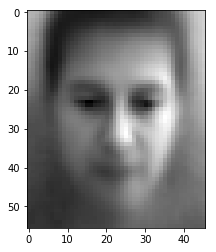

In [121]:
mean_face = np.mean( train_set, axis = 1 )

print( 'Mean Face Shape {}'.format( mean_face.shape ) )
mean_face_img = np.reshape(mean_face,(46,56))
plt.imshow( mean_face_img.T, cmap = 'gist_gray')

# SB

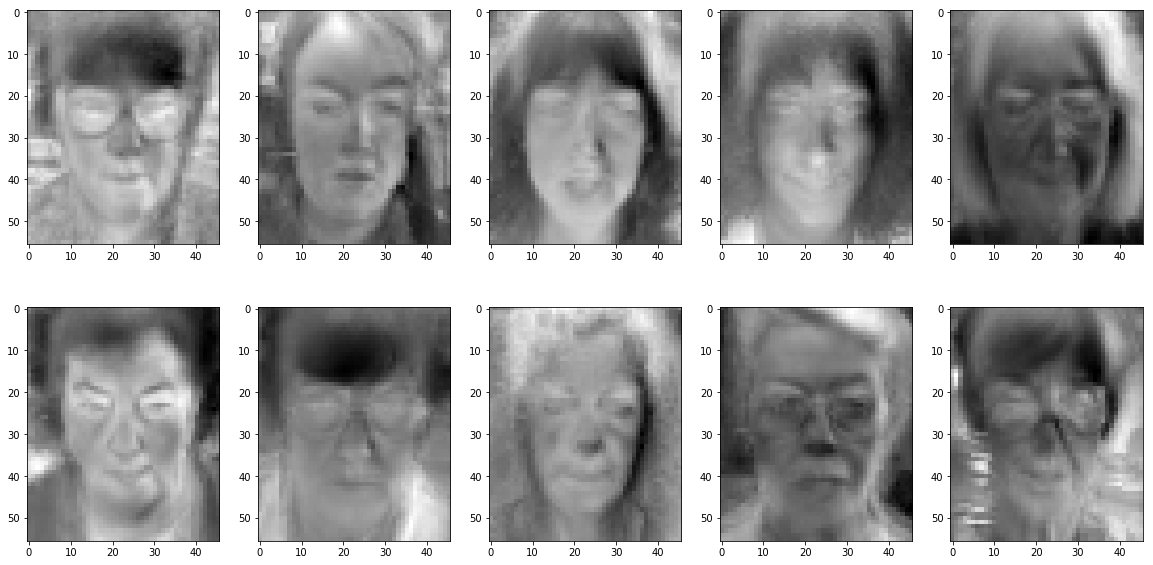

In [122]:
sub = class_means

for i in range( sub.shape[ 0 ] ):
    sub[ i ] = sub[ i ] - mean_face
    
fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    
    img = np.reshape( sub[ i ], ( 46, 56 ) )
    
    fig.add_subplot( 2, 5, i + 1 )
    plt.imshow( img.T, cmap = 'gist_gray' )
    
plt.show()

In [126]:
S_B = np.dot( sub.T, sub )

print( 'S_B: {}'.format( S_B.shape ) )

S_B: (2576, 2576)


# SW

In [ ]:
class_faces = { k : [] for k in range( 1, 53 ) }

for i in range( len( class_indexes[ i ] )